### Importing libreries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Data Collection & Analysis 

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Visualization

c:\Users\dasch\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x1000 with 0 Axes>

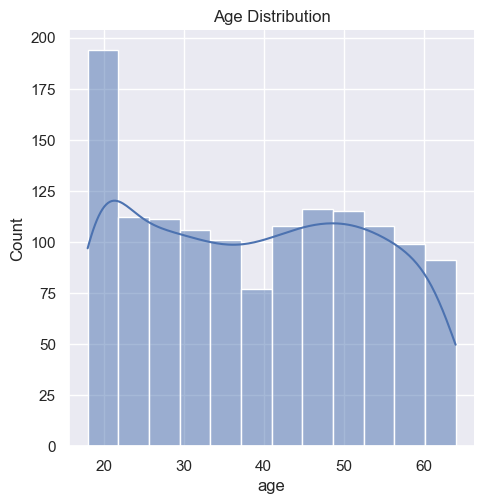

In [9]:
sns.set()
plt.figure(figsize=(10,10))
sns.displot(df['age'], kde = True)
plt.title('Age Distribution')
plt.show()

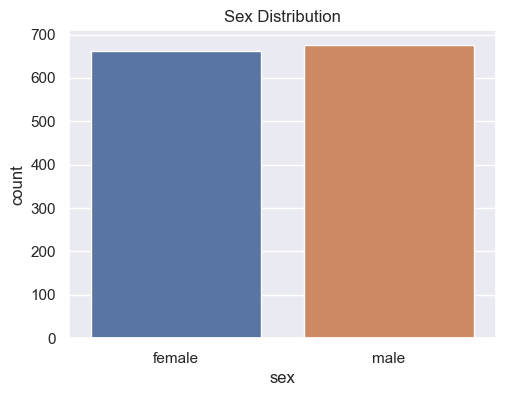

In [10]:
plt.figure(figsize=(5.5,4))
sns.countplot(x ='sex', data = df)
plt.title('Sex Distribution')
plt.show()

In [11]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

c:\Users\dasch\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x1000 with 0 Axes>

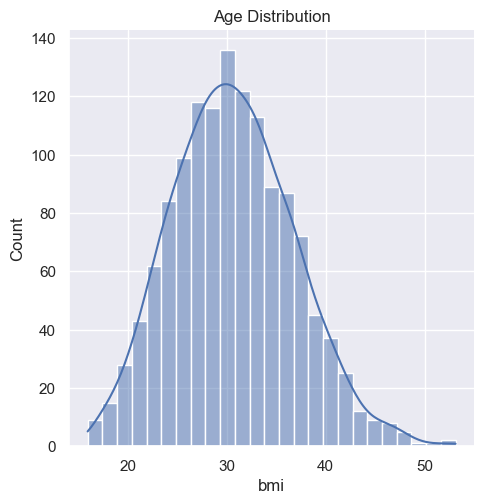

In [12]:
plt.figure(figsize=(10,10))
sns.displot(df['bmi'], kde = True)
plt.title('Age Distribution')
plt.show()

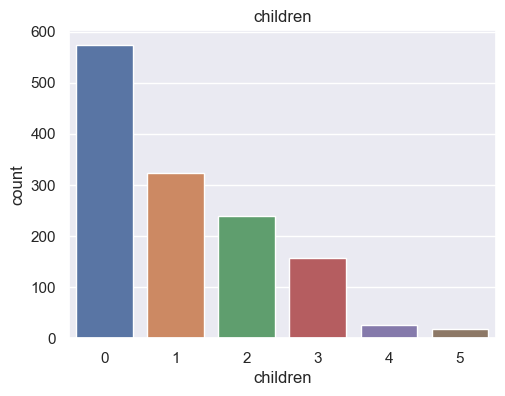

In [13]:
plt.figure(figsize=(5.5,4))
sns.countplot(x ='children', data = df)
plt.title('children')
plt.show()

In [14]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

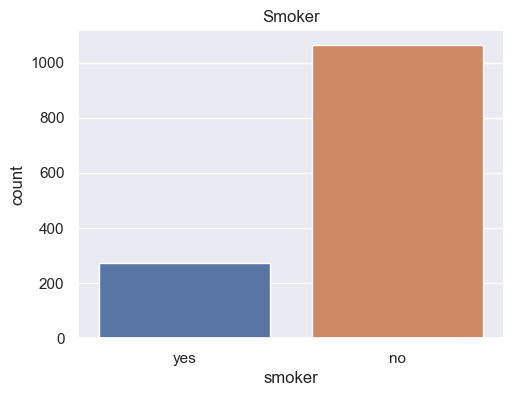

In [15]:
plt.figure(figsize=(5.5,4))
sns.countplot(x ='smoker', data = df)
plt.title('Smoker')
plt.show()

In [16]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

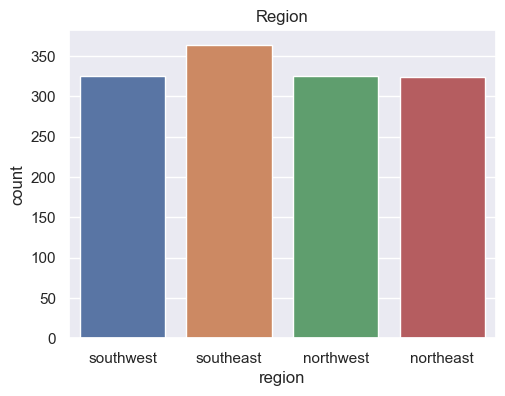

In [17]:
plt.figure(figsize=(5.5,4))
sns.countplot(x ='region', data = df)
plt.title('Region')
plt.show()

In [18]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

c:\Users\dasch\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x1000 with 0 Axes>

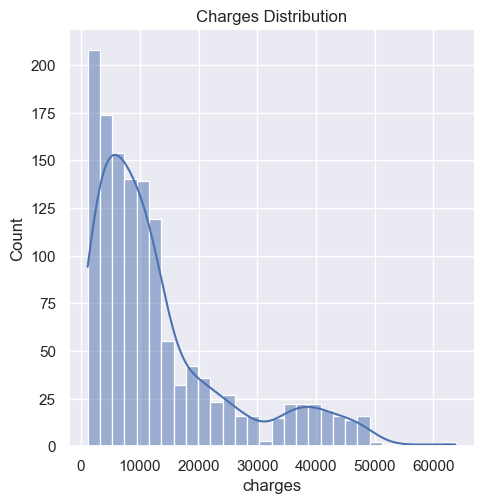

In [19]:
plt.figure(figsize=(10,10))
sns.displot(df['charges'], kde = True)
plt.title('Charges Distribution')
plt.show()

In [20]:
df.replace({ 'sex' : { 'male' : 0, 'female' : 1}}, inplace=True)

df.replace({  'smoker' : { 'yes' :0,'no' : 1}}, inplace=True)

df.replace({ 'region' : { 'southeast':0,'southwest' : 1,'northeast' : 2,'northwest' :3}}, inplace = True)

In [36]:
corr_matrix = df.corr()

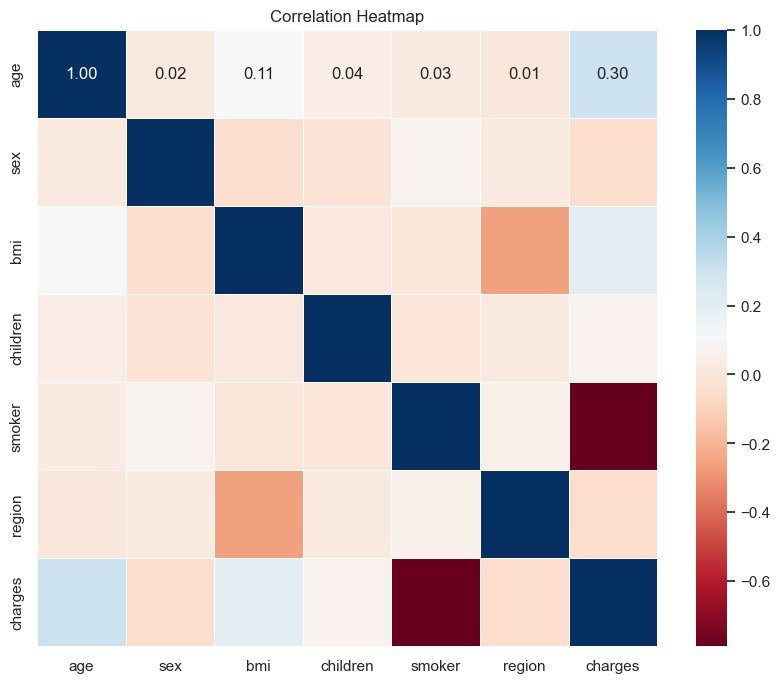

In [38]:
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [23]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [24]:
print(x)

[[19.    1.   27.9   0.    0.    1.  ]
 [18.    0.   33.77  1.    1.    0.  ]
 [28.    0.   33.    3.    1.    0.  ]
 ...
 [18.    1.   36.85  0.    1.    0.  ]
 [21.    1.   25.8   0.    1.    1.  ]
 [61.    1.   29.07  0.    0.    3.  ]]


### Splitting the data set

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 2)

In [26]:
print(x.shape, x_test.shape, x_train.shape)

(1338, 6) (446, 6) (892, 6)


### Model training

In [27]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

### Model Evaluation

In [28]:
## Evaluation for training data
y_pred_train = regressor.predict(x_train)
predict_data = pd.DataFrame({'Predict Data': y_pred_train, 'Actual Data': y_train}) 
print(predict_data)

     Predict Data  Actual Data
0     8278.834520   8582.30230
1     2359.703003   2842.76075
2    35764.029982  28950.46920
3      499.147782   1711.02680
4     3743.555035   4428.88785
..            ...          ...
887  12781.311188  13224.69300
888  10363.491829   9249.49520
889  17218.861600  12574.04900
890   9629.641150   9861.02500
891  13734.056300  13019.16105

[892 rows x 2 columns]


### R-Square Score

In [29]:
r2_train = metrics.r2_score(y_train,y_pred_train)
print('R^2 Score of this model is: ', r2_train)

R^2 Score of this model is:  0.734878118887692


In [30]:
## Evaluation for testinhg data
y_pred_test = regressor.predict(x_test)
predict_data_test = pd.DataFrame({'Predict Data': y_pred_test, 'Actual Data': y_test}) 
print(predict_data_test)

     Predict Data  Actual Data
0     1737.549196   2395.17155
1    11547.737780  11286.53870
2    10131.001356   9617.66245
3     2486.755769   1719.43630
4     8044.956441   8891.13950
..            ...          ...
441   4144.895097   2632.99200
442   4470.897947   4529.47700
443   8979.015536   4667.60765
444  34079.522197  48885.13561
445   4255.190630   5354.07465

[446 rows x 2 columns]


In [31]:
r2_test = metrics.r2_score(y_test,y_pred_test)
print('R^2 Score of this model is: ', r2_test)

R^2 Score of this model is:  0.7720691115997188


### Build a Predictive system

In [32]:
input_data = (55,0,37.3,0,1,1)
### changing imput to a numpy array
inputDataAsNp_array = np.asarray(input_data)

### reshape the array
data_reshape =  inputDataAsNp_array.reshape(1,-1)

prediction = regressor.predict(data_reshape)
print(prediction)

print('The insurance cost is {} USD'.format(prediction[0]))

[13748.87221661]
The insurance cost is 13748.87221661267 USD
